<a href="https://colab.research.google.com/github/etodasha/PRA-M2.875-2020.2/blob/main/PRA_DL_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle


In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 69 bytes


In [ ]:
!kaggle datasets download "jordidelatorreuoc/kaggle-plant-pathology-2021-modificat"

 99% 961M/970M [00:13<00:00, 73.1MB/s]
100% 970M/970M [00:13<00:00, 77.2MB/s]


In [ ]:
!unzip kaggle-plant-pathology-2021-modificat.zip

In [ ]:
import pandas as pd
import numpy as np 
import tensorflow as tf
import keras 
import os
import matplotlib.pylab as plt
import cv2
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout, ZeroPadding2D, GlobalAveragePooling2D,BatchNormalization
from keras.optimizers import Adam, SGD,RMSprop,Adadelta,Adagrad,Adamax,Nadam,Ftrl
from keras.layers.experimental.preprocessing import Resizing
from keras.callbacks import *

In [ ]:
p = 'train'

images = []
classes = []

with os.scandir(p) as out:
    print('train:')
    for dirs in out:
        l = os.listdir(dirs)
        images.append(len(l))
        classes.append(dirs.name)
        print(dirs.name, ':', len(l))    
        
p = 'test'

with os.scandir(p) as out:
    print('test:')
    print(len([dir for dir in out]))

train:
C3 : 1100
C2 : 1200
C4 : 1300
C5 : 1150
C1 : 1000
C0 : 4000
test:
7527


C3
total images: 1100
% of total: 11.28 %
% of ill: 12.72 %
C2
total images: 1200
% of total: 12.31 %
% of ill: 13.87 %
C4
total images: 1300
% of total: 13.33 %
% of ill: 15.03 %
C5
total images: 1150
% of total: 11.790000000000001 %
% of ill: 13.29 %
C1
total images: 1000
% of total: 10.26 %
% of ill: 11.559999999999999 %
C0
total images: 4000
% of total: 41.03 %
total images of ill: 8650


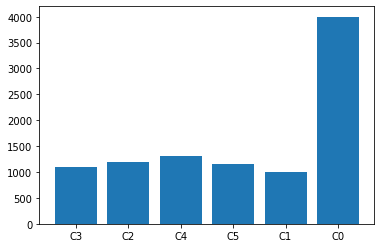

In [ ]:
# class balances 
mysum = sum(images)
mysum_ill = sum(images[1:])

for c,n in list(zip(classes,images)):
    print(c)
    print('total images:', n)
    print('% of total:', round(n/mysum,4)*100,'%')
    if c!='C0':
        print('% of ill:', round(n/mysum_ill,4)*100,'%')
        
print('total images of ill:', mysum_ill)

plt.bar(classes,images);

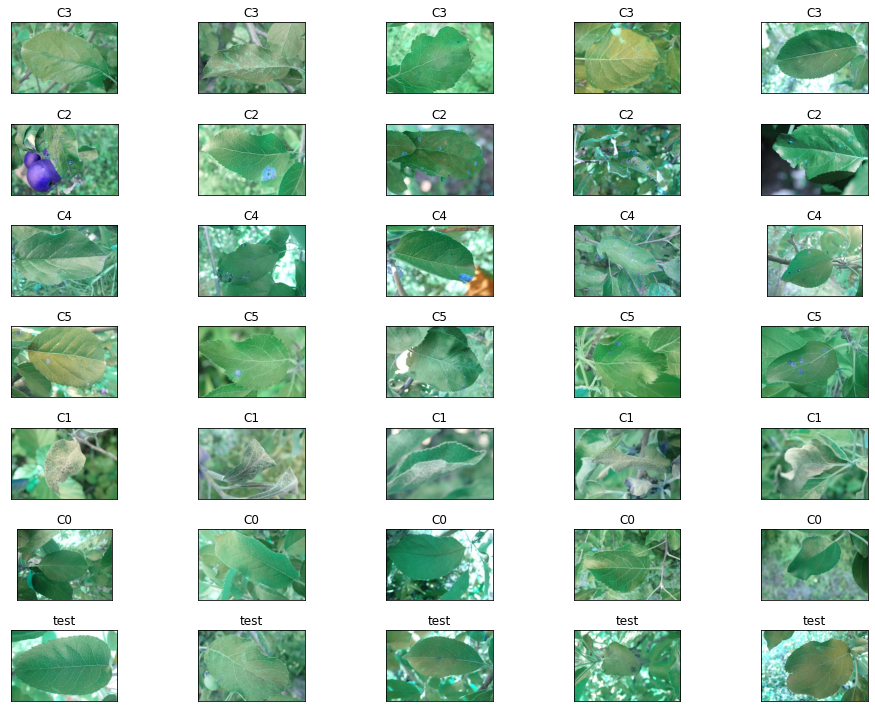

In [ ]:
fig,i = plt.figure(figsize=(15, 10)),1

with os.scandir('train') as out:
    for dirs in out:
      l = os.listdir(dirs)
      for x in range(5):
        image = os.path.join(dirs, l[x])
        img = cv2.imread(image)
        ax = fig.add_subplot(7, 5, i)
        ax.set_title(dirs.name)
        plt.imshow(img)
        plt.xticks([]), plt.yticks([])
        plt.tight_layout()
        i += 1


with os.scandir('test') as out:
    for dir in [dir for dir in out]:
      image = os.path.join(dir)
      img = cv2.imread(image)
      ax = fig.add_subplot(7, 5, i)
      ax.set_title('test')
      plt.imshow(img)
      plt.xticks([]), plt.yticks([])
      plt.tight_layout()
      i += 1
      if i==36:
        break


In [ ]:
# image shapes : height x width x channels
with os.scandir('train') as out:
    for dirs in out:
      l = os.listdir(dirs)
      image = os.path.join(dirs, l[66])
      img = cv2.imread(image)
      print(dirs.name)
      print("Image shape:",img.shape)
      print("Image range:",min(np.ravel(img)),max(np.ravel(img)))
            
                
with os.scandir('test') as out:
    for dir in [dir for dir in out]:
      image = os.path.join(dir)
      img = cv2.imread(image)
      print('test')
      print("Image shape:",img.shape)
      print("Image range:",min(np.ravel(img)),max(np.ravel(img)))
      break

C3
Image shape: (373, 498, 3)
Image range: 0 255
C2
Image shape: (331, 498, 3)
Image range: 5 255
C4
Image shape: (332, 498, 3)
Image range: 22 255
C5
Image shape: (332, 498, 3)
Image range: 0 255
C1
Image shape: (332, 498, 3)
Image range: 4 244
C0
Image shape: (332, 498, 3)
Image range: 13 255
test
Image shape: (332, 498, 3)
Image range: 0 255
